**trayectorias estado-esopaciales por medio de un pca**

 1. implementaremos un PCA
 2. Inspeccionaremos y limpiaremos datos de seres de tiempo multivariados


In [132]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat #estamos importando mat lab file

**lo primero es importar los datos, vamos a modificarlo ytrabajar con la tabla**

Estos datos tienen un problema, y necesitamos limpiarlos, contiene la actividad de neuronas, y si estas neuronas reaccionan a parte especificas del cuerpo



In [133]:
import scipy.io
rute= "D://ACADEMIA//cursos aparte//Udemy Python//MasterPython_CodeAndData//MasterPython_CodeAndData//stateSpaceTrajectories//ALMdata.mat"
rute
matdat = scipy.io.loadmat(rute)#open mat archivos
matdat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jul 21 07:38:12 2020',
 '__version__': '1.0',
 '__globals__': [],
 'Channel_all': array([[ 1],
        [11],
        [14],
        ...,
        [13],
        [13],
        [14]], dtype=uint8),
 'PSTH_nonprefer_cue_aligned': array([[ 0.11764706,  0.11764706,  0.11764706, ...,  3.76470588,
          3.64705882,  3.76470588],
        [ 0.0862069 ,  0.0862069 ,  0.0862069 , ...,  0.0862069 ,
          0.0862069 ,  0.0862069 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.4       ,
          0.4       ,  0.4       ],
        ...,
        [ 1.53846154,  1.53846154,  1.53846154, ...,  2.15384615,
          2.15384615,  2.15384615],
        [11.16438356, 11.30136986, 11.36986301, ..., 18.42465753,
         18.42465753, 18.49315068],
        [ 3.45238095,  3.51190476,  3.51190476, ...,  2.38095238,
          2.5       ,  2.55952381]]),
 'PSTH_prefer_cue_aligned': array([[ 0.        ,  0.        ,  0.        , ..

In [160]:
Nopr = matdat["PSTH_nonprefer_cue_aligned"] # matriz de datos 1
Pref = matdat["PSTH_prefer_cue_aligned"] #matriz de datos 2
t=matdat["t"][0] # vector de tiempo
chanidx = matdat["Channel_all"] # chanel index se vaa necesitar por que nos dice que anal pertenece a que neuronas


print(Nopr.shape), print(" ")
print(Pref.shape), print(" ")
print(t.shape), print(" ") 
print(chanidx.shape), print(" ") #esto es solo una columna, tiene orentacion, vamos a necesitar que sea un vector
chanidx=chanidx.flatten()
print(chanidx.shape)

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186, 1)
 
(1186,)


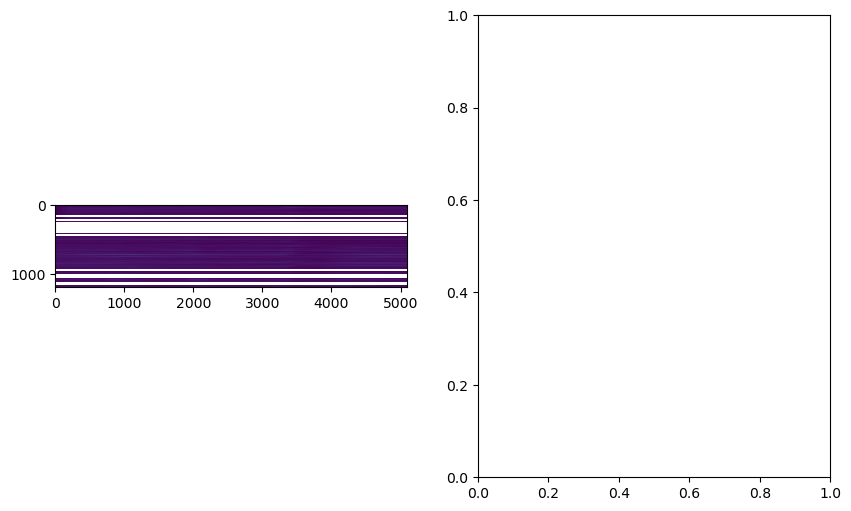

In [114]:
# vamos a hacer un grafco exploratorio
ig,ax=plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(Nopr)
plt.show() #x axis muestra indices pero no tiempo

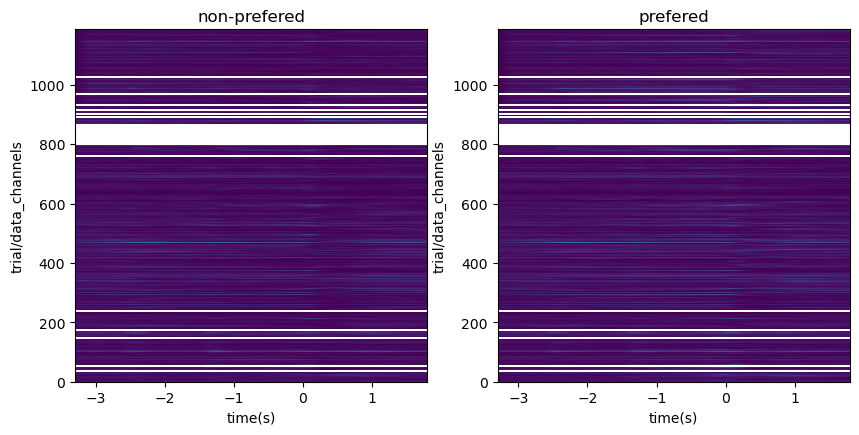

In [115]:
#extender el grafico para que quede mas abierto
ig,ax=plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr, extent=[t[0],t[-1],0,Nopr.shape[0],0]) #solo quedan en una clumna
# el ",0])" es para darle la direcion correcta alaeje
ax[0].set_aspect(1/ax[0].get_data_ratio()) #arreglams el ratio de X
ax[0].set_xlabel("time(s)")
ax[0].set_ylabel("trial/data_channels")
ax[0].set_title("non-prefered")
#grafico2 ax[1]
ax[1].imshow(Pref, extent=[t[0],t[-1],0,Pref.shape[0],0])
ax[1].set_aspect(1/ax[1].get_data_ratio()) #arreglams el ratio de X
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("trial/data_channels")
ax[1].set_title("prefered")
primer_intento=plt.show()
primer_intento

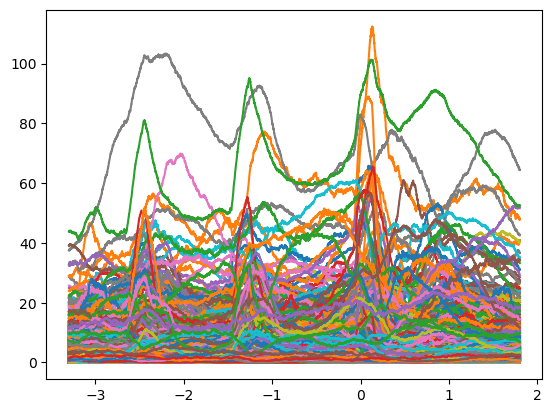

In [116]:
plt.plot(t,Nopr.T) # me a un error quem e indica el orend de lo ejes... por lo que transponemos con "Nopr.T"
#en este grafico las variables empiezan a subir como en 40
plt.show() #pero no sabemos que linea corresponde a que

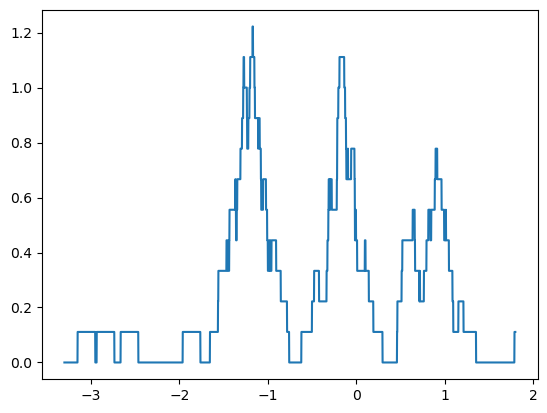

In [164]:
plt.plot(t,Nopr[380,:].T) # me a un error quem e indica el orend de lo ejes... por lo que transponemos con "Nopr.T"
plt.show() #pero no sabemos que linea corresponde a que
Nopr[380,:] #esto esta vacio... por lo que necesitamos deshacerno de esto


np.isfinite(5) # me dice si el elemento es infinito o no
np.isfinite(Nopr[:,0]) #necesito deshacerme de filas enteras, los elemento s en nan y sobreescribir el objeto
Nopr=Nopr[np.isfinite(Nopr[:,0]),:]
Pref=Pref[np.isfinite(Pref[:,0]),:]
chanidx = chanidx[np.isfinite(Pref[:,0])]

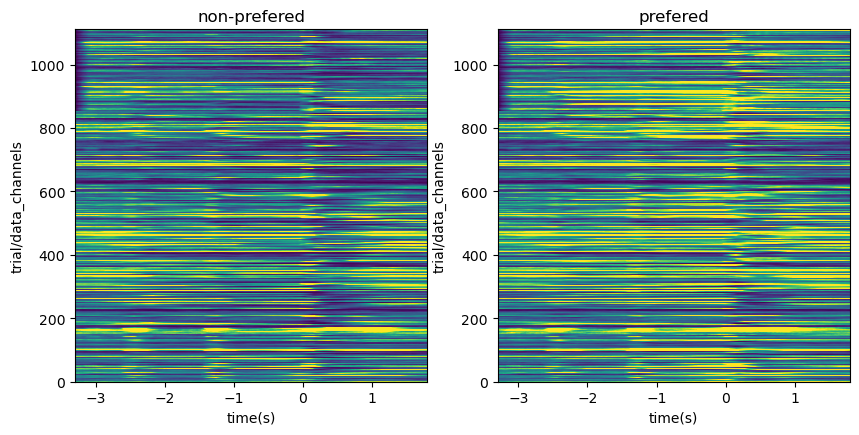

In [139]:
#HAcemos un segundo intento on lo graficos por que ya quitamos los vacios
#si volvemos a correr este grafico nos va a dar cosas diferentes al primer intento
ig,ax=plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(Nopr, extent=[t[0],t[-1],0,Nopr.shape[0],0],
             vmin=0,vmax=10) #añadimos esto para las limitantes y el color, lo ponemos bajos para que ñas d diferencias que den mas marcadas vmax=10
ax[0].set_aspect(1/ax[0].get_data_ratio()) #arreglams el ratio de X
ax[0].set_xlabel("time(s)")
ax[0].set_ylabel("trial/data_channels")
ax[0].set_title("non-prefered")
#grafico2 ax[1]
ax[1].imshow(Pref, extent=[t[0],t[-1],0,Pref.shape[0],0],vmin=0,vmax=10) #añadimos esto para las limitantes y el color)
ax[1].set_aspect(1/ax[1].get_data_ratio()) #arreglams el ratio de X
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("trial/data_channels")
ax[1].set_title("prefered")
segundo_intento=plt.show()
segundo_intento

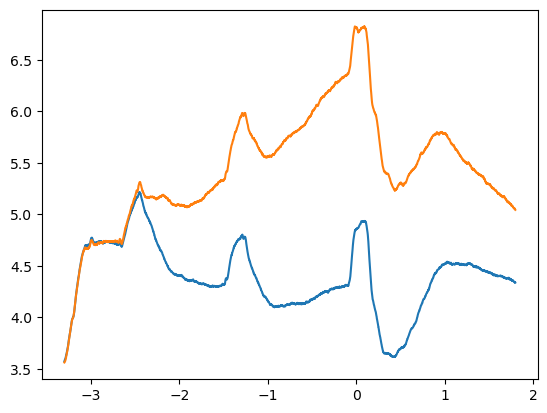

In [140]:
#por ultimo graficamos el promedio
plt.plot(t,np.mean(Nopr,axis=0),label="Nonpref") #"axis=0" indica el eje sobre la cual debemos hacer el grafico
plt.plot(t,np.mean(Pref,axis=0),label="Pref")

**a continuacion vamos a hacer una matriz de covarianza**

un pca esta basado en la composicion eigen de la matriz de covariacion
una matriz de covariacion son las filas * las filas y nos dice la correlacion entre las filas, comparaciones pareadas, en estos casos podemos hacer un mapa de temperatura (colores) de la correlacion
1. usamos funcion que haga nustra correlacion....
2. pero necesitamos crear nuevas matrices, poruqe las matrices que tenemos son todas las repeticiones separadas... necesitamos hacer el promedio de todas las repeticiones
3. hacemos un promedio de estas dos matrices de covariacion

In [166]:
#1-2: vamso a hacer nuestras matrices promedio
nchans=np.max(chanidx) 
chanaveNopr=np.zeros((nchans,len(t))) #chnels by time  data matrix
chanavePref=np.zeros((nchans,len(t)))
for i in range(1,nchans+1):  # for i in range(nchans): si colo co solo esto me da error porque si lo dejo de 0 ira hasta 63
    chanaveNopr[i-1,:]=np.mean(Nopr[chanidx==i,:],axis=0)
    chanavePref[i-1,:]=np.mean(Pref[chanidx==i,:],axis=0) 

print(chanaveNopr.shape)

(64, 5101)


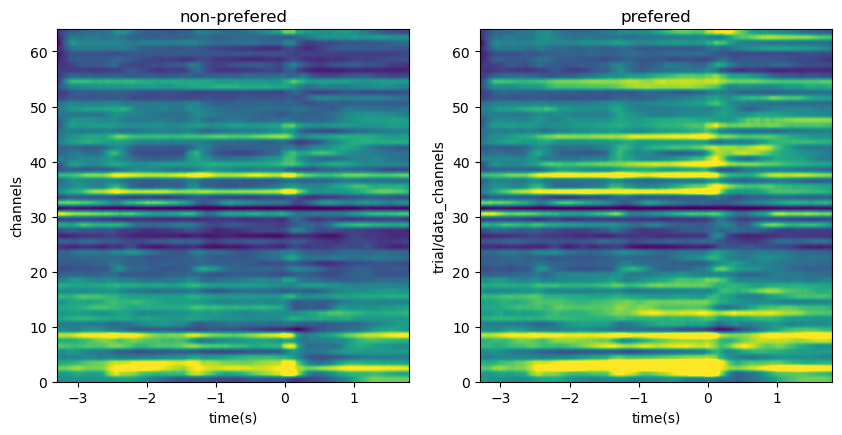

In [168]:
#graficar lasmedias
ig,ax=plt.subplots(1,2,figsize=(10,6))

ax[0].imshow(chanaveNopr, extent=[t[0],t[-1],0,chanaveNopr.shape[0],0],
             vmin=0,vmax=10) #añadimos esto para las limitantes y el color, lo ponemos bajos para que ñas d diferencias que den mas marcadas vmax=10
ax[0].set_aspect(1/ax[0].get_data_ratio()) #arreglams el ratio de X
ax[0].set_xlabel("time(s)")
ax[0].set_ylabel("channels")
ax[0].set_title("non-prefered")
#grafico2 ax[1]
ax[1].imshow(chanavePref, extent=[t[0],t[-1],0,chanavePref.shape[0],0],vmin=0,vmax=10) #añadimos esto para las limitantes y el color)
ax[1].set_aspect(1/ax[1].get_data_ratio()) #arreglams el ratio de X
ax[1].set_xlabel("time(s)")
ax[1].set_ylabel("trial/data_channels")
ax[1].set_title("prefered")
medias_intento=plt.show()
medias_intento


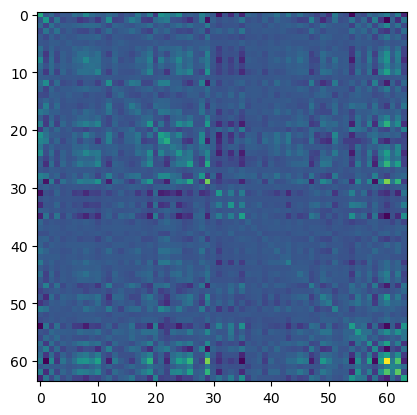

In [170]:
#computar matrices de covarianza
covmatPref=np.cov(chanavePref)
covmatNopr=np.cov(chanaveNopr)
covmat= (covmatPref+covmatNopr)/2
plt.imshow(covmat)